In [ ]:
#install.packages("parallelDist")
install.packages("data.table")
install.packages("dplyr")
install.packages("reshape")
install.packages("forecast")
install.packages("ggplot2")
#install.packages("RcppArmadillo")
#install.packages("RcppXPtrUtils")
install.packages("fastcluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(fastcluster)
#library(parallelDist) # https://www.rdocumentation.org/packages/parallelDist/versions/0.1.1/topics/parDist
library(data.table) # read CSV file
library(dplyr)
library(reshape)
library(forecast) # MA 계산
library(ggplot2) # for vis


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following object is masked from ‘package:data.table’:

    melt


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
install.packages("cluster")

library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(RcppArmadillo)
# Use RcppXPtrUtils for simple usage of C++ external pointers
library(RcppXPtrUtils)
# compile user-defined function and return pointer (RcppArmadillo is used as dependency)
corFuncPtr <- cppXPtr("double customDist(const arma::mat &A, const arma::mat &B) {
                                 return sqrt( 2 * ( 1 - arma::accu(arma::cor(A , B)) )); }",
                      depends = c("RcppArmadillo"))

In [ ]:
reduced = read.csv("for_cluster_final_1.csv")
reduced

item_name                                                       
1     BERGEN 데이베드 침대                                           
2     CHAMBER 벙커침대 3size                                         
3     ISABELLA 데이베드 침대                                         
4     MAKONIS 침대 SS/Q                                              
5     MARINO 분리형 이층침대 트윈싱글 3colors 100200                 
6     MILKAM 콘솔수납장 17585 CHM85175                               
7     RELLY 침대 시리즈                                              
8     VELLO 이층침대 싱글/더블 100200/140200                         
9    (1+1) 내츄럴모노 윈저 의자 세트                                 
10   (국내생산) 학생/사무용 책상 의자 S10 (기본형)                   
11   (국내생산) 학생/사무용 책상 의자 S10 (헤드형)                   
12   (국내생산) 학생/사무용 책상 의자 STC10 (기본형)                 
13   (국내생산) 학생/사무용 책상 의자 STC18 (기본형)                 
14   (당일발송) 가로 높이조절 사이드테이블                           
15   (당일발송) 다용도 좌식 테이블                                   
16   (당일발송) 다용도 카페 식탁 테이블 800 2colors                  
17   (당일발송) 라인 원형 벨벳 수납 스툴 의자 2colors (+사은품 증정) 
18   (당일발송) 스틸 좌식 데스크 확장형                              
19   (당일발송) 스틸 책상 겸 테이블 800                              
20   (당일발송) 스틸 테이블 2size                                    
21   (당일발송) 원형 벨벳 수납 스툴 의자 4colors (+사은품 증정)      
22   (당일발송) 카페 인테리어 식탁 의자 4color                       
23   (리뷰이벤트) 그루브 LED조명 수납침대 프레임 SS/Q                
24   (리뷰이벤트) 누보 무헤드 빅서랍 수납침대 프레임 SS/Q            
25   (리뷰이벤트) 도로시 LED조명 통서랍 수납침대 프레임 SS/Q         
26   (리뷰이벤트) 라끄 전신거울 수납 화장대                          
27   (리뷰이벤트) 밀리 LED조명 확장형 화장대포함 수납침대 프레임 SS/Q
28   (리뷰이벤트) 바오 틈새수납장 스탠딩 화장대(콘센트)              
29   (리뷰이벤트) 샐리 800 수납거울 화장대(콘센트)                   
30   (리뷰이벤트) 플랫 무헤드 3단 수납침대 (매트포함) SS/Q           
⋮    ⋮                                                               
4331 홈베드트레이                                                    
4332 홈카페 디자인 접이식 테이블 2size 5colors(리뷰이벤트)           
4333 홈카페 반타원테이블 1000size                                    
4334 홈카페 반타원테이블 800size                                     
4335 홈카페 원형테이블 600size 2colors                               
4336 홈카페 원형테이블 800size 2colors                               
4337 화사 600 렌지대 수납장                                          
4338 화이트 마틴 H형 좌식 책상                                       
4339 화이트 마틴 기본형 책상 1200mm                                  
4340 화이트 마틴 스퀘어형 책상 1200mm                                
4341 화이트 심포니 1악장 타원형테이블 1000size                       
4342 화이트 심포니 2악장 원형테이블 1000size                         
4343 화이트 타원 좌식 소파 접이식 화이트 다리 거실 테이블 1200 x 600 
4344 화이트 폭좁은 슬림 5단 서랍장 500 (화이트)                      
4345 화이트 호마이카 HPL HPM 라미네이트 라운드 2인 원목식탁          
4346 화이트식탁 1000 원목 원형 테이블 GLS166C                        
4347 화이트식탁 800 원목 원형 테이블 GLS165C                         
4348 화이트우드 3단 전자렌지대 / 3단선반                             
4349 화이트우드 4단 전자렌지대 / 4단선반                             
4350 확장형 세라믹 인출식 식탁 1600~2300 (2color)                    
4351 확장형 티테이블 2colors                                         
4352 휘게체어 5colors                                                
4353 휴 LED 3서랍수납형 침대(매트 미포함) SS/Q/K                     
4354 휴 조이 좌식 리클라이너 의자 2colors                            
4355 히노 편백 원목 LED헤드 멀티수납형 침대 SS/Q (매트제외)          
4356 히알린 좌식테이블                                               
4357 히토 대리석 사이드 테이블                                       
4358 히포 원목 체어                                                  
4359 힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)       
4360 힙스터 수납형 드럼스툴 8colors                                  
     item_brand   item_count total_score dur_score price_score design_score
1    마켓비         68       4.402941    3.982143  4.196429    4.589286    
2    마켓비        229       4.167686    3.689815  4.166667    4.351852    
3    마켓비         11       4.254545    4.090909  4.454545    4.272727    
4    마켓비         17       3.917647    3.666667  3.800000    4.200000    
5    마켓비         10       3.540000    3.333333  3.55555

In [ ]:
library(magrittr)

In [ ]:
#reduced$item_category1 <- as.factor(reduced$item_category1)
reduced$item_brand <- as.factor(reduced$item_brand)
reduced$item_name <- as.factor(reduced$item_name)
reduced

item_name                                                       
1     BERGEN 데이베드 침대                                           
2     CHAMBER 벙커침대 3size                                         
3     ISABELLA 데이베드 침대                                         
4     MAKONIS 침대 SS/Q                                              
5     MARINO 분리형 이층침대 트윈싱글 3colors 100200                 
6     MILKAM 콘솔수납장 17585 CHM85175                               
7     RELLY 침대 시리즈                                              
8     VELLO 이층침대 싱글/더블 100200/140200                         
9    (1+1) 내츄럴모노 윈저 의자 세트                                 
10   (국내생산) 학생/사무용 책상 의자 S10 (기본형)                   
11   (국내생산) 학생/사무용 책상 의자 S10 (헤드형)                   
12   (국내생산) 학생/사무용 책상 의자 STC10 (기본형)                 
13   (국내생산) 학생/사무용 책상 의자 STC18 (기본형)                 
14   (당일발송) 가로 높이조절 사이드테이블                           
15   (당일발송) 다용도 좌식 테이블                                   
16   (당일발송) 다용도 카페 식탁 테이블 800 2colors                  
17   (당일발송) 라인 원형 벨벳 수납 스툴 의자 2colors (+사은품 증정) 
18   (당일발송) 스틸 좌식 데스크 확장형                              
19   (당일발송) 스틸 책상 겸 테이블 800                              
20   (당일발송) 스틸 테이블 2size                                    
21   (당일발송) 원형 벨벳 수납 스툴 의자 4colors (+사은품 증정)      
22   (당일발송) 카페 인테리어 식탁 의자 4color                       
23   (리뷰이벤트) 그루브 LED조명 수납침대 프레임 SS/Q                
24   (리뷰이벤트) 누보 무헤드 빅서랍 수납침대 프레임 SS/Q            
25   (리뷰이벤트) 도로시 LED조명 통서랍 수납침대 프레임 SS/Q         
26   (리뷰이벤트) 라끄 전신거울 수납 화장대                          
27   (리뷰이벤트) 밀리 LED조명 확장형 화장대포함 수납침대 프레임 SS/Q
28   (리뷰이벤트) 바오 틈새수납장 스탠딩 화장대(콘센트)              
29   (리뷰이벤트) 샐리 800 수납거울 화장대(콘센트)                   
30   (리뷰이벤트) 플랫 무헤드 3단 수납침대 (매트포함) SS/Q           
⋮    ⋮                                                               
4331 홈베드트레이                                                    
4332 홈카페 디자인 접이식 테이블 2size 5colors(리뷰이벤트)           
4333 홈카페 반타원테이블 1000size                                    
4334 홈카페 반타원테이블 800size                                     
4335 홈카페 원형테이블 600size 2colors                               
4336 홈카페 원형테이블 800size 2colors                               
4337 화사 600 렌지대 수납장                                          
4338 화이트 마틴 H형 좌식 책상                                       
4339 화이트 마틴 기본형 책상 1200mm                                  
4340 화이트 마틴 스퀘어형 책상 1200mm                                
4341 화이트 심포니 1악장 타원형테이블 1000size                       
4342 화이트 심포니 2악장 원형테이블 1000size                         
4343 화이트 타원 좌식 소파 접이식 화이트 다리 거실 테이블 1200 x 600 
4344 화이트 폭좁은 슬림 5단 서랍장 500 (화이트)                      
4345 화이트 호마이카 HPL HPM 라미네이트 라운드 2인 원목식탁          
4346 화이트식탁 1000 원목 원형 테이블 GLS166C                        
4347 화이트식탁 800 원목 원형 테이블 GLS165C                         
4348 화이트우드 3단 전자렌지대 / 3단선반                             
4349 화이트우드 4단 전자렌지대 / 4단선반                             
4350 확장형 세라믹 인출식 식탁 1600~2300 (2color)                    
4351 확장형 티테이블 2colors                                         
4352 휘게체어 5colors                                                
4353 휴 LED 3서랍수납형 침대(매트 미포함) SS/Q/K                     
4354 휴 조이 좌식 리클라이너 의자 2colors                            
4355 히노 편백 원목 LED헤드 멀티수납형 침대 SS/Q (매트제외)          
4356 히알린 좌식테이블                                               
4357 히토 대리석 사이드 테이블                                       
4358 히포 원목 체어                                                  
4359 힐러 고급형 호텔식 투매트리스 침대 프레임 2color (SS/Q/K)       
4360 힙스터 수납형 드럼스툴 8colors                                  
     item_brand   item_count total_score dur_score price_score design_score
1    마켓비         68       4.402941    3.982143  4.196429    4.589286    
2    마켓비        229       4.167686    3.689815  4.166667    4.351852    
3    마켓비         11       4.254545    4.090909  4.454545    4.272727    
4    마켓비         17       3.917647    3.666667  3.800000    4.200000    
5    마켓비         10       3.540000    3.333333  3.55555

In [ ]:
gower_distance <- daisy(reduced[, 2:13], metric = c("gower"))
class(gower_distance)

[1] "dissimilarity" "dist"

In [ ]:
gower_distance2 <- daisy(reduced[, 3:13], metric = c("gower"))
class(gower_distance2)

[1] "dissimilarity" "dist"

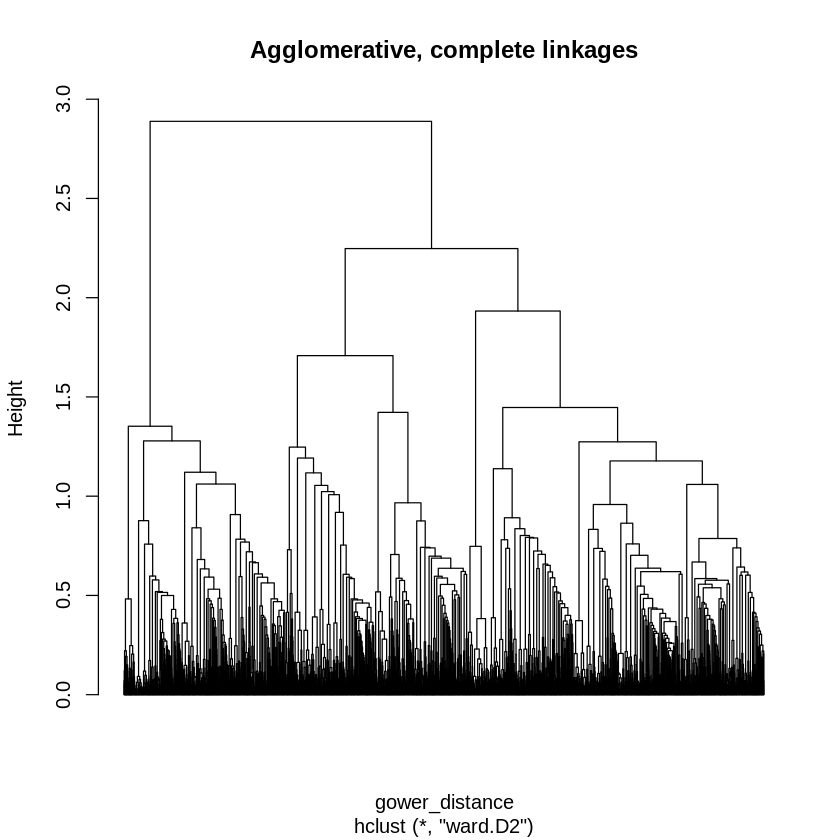

In [ ]:
hc <- hclust(gower_distance, method = "ward.D2")
plot(hc, main = "Agglomerative, ward.D2", cex = 0.01, hang = -1, label = F)

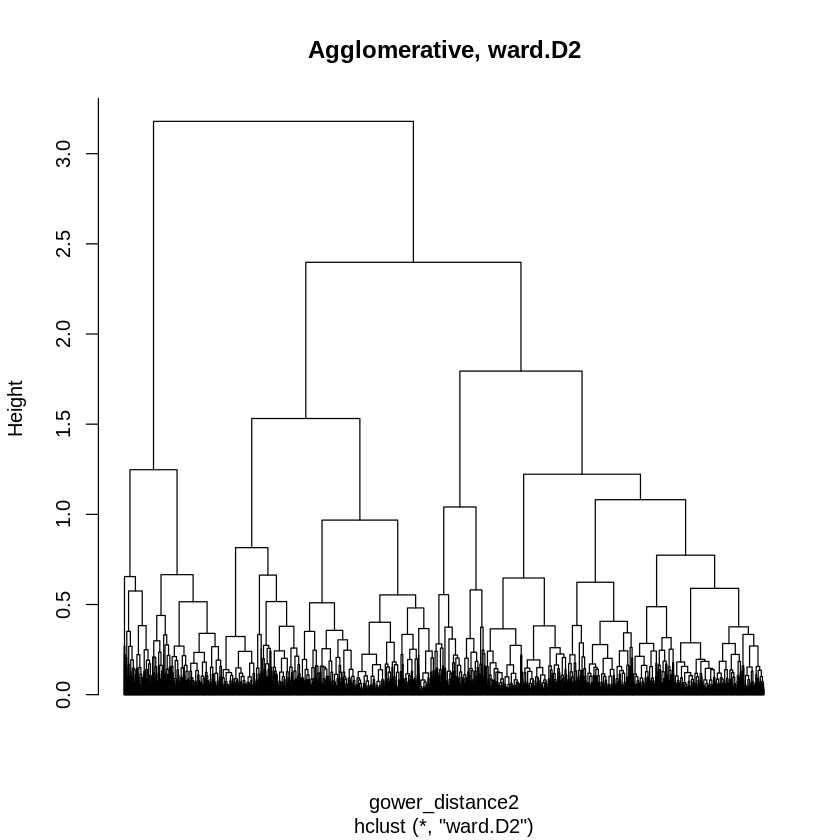

In [ ]:
hc2 <- hclust(gower_distance2, method = "ward.D2")
plot(hc2, main = "Agglomerative, ward.D2", cex = 0.01, hang = -1, label = F)

In [ ]:
print(table(cutree(hc, k = 4)))#
print(table(cutree(hc, k = 5)))
print(table(cutree(hc, k = 6)))
print(table(cutree(hc, k = 7)))
print(table(cutree(hc, k = 8)))
print(table(cutree(hc, k = 9)))
print(table(cutree(hc, k = 10)))#


   1    2    3    4 
 152 1865 1099 1244 

   1    2    3    4    5 
 152 1865 1099  636  608 

   1    2    3    4    5    6 
 152 1299 1099  636  566  608 

   1    2    3    4    5    6    7 
 152 1299 1099  540  566  608   96 

   1    2    3    4    5    6    7    8 
 152 1299 1020  540  566  608   79   96 

   1    2    3    4    5    6    7    8    9 
 152 1299  705  540  566  608   79  315   96 

   1    2    3    4    5    6    7    8    9   10 
 152 1210  705  540  566  608   79  315   89   96 


In [ ]:
write.csv(as.data.frame(cutree(hc2, k = 4)), "c4.csv")
write.csv(as.data.frame(cutree(hc2, k = 5)), "c5.csv")
write.csv(as.data.frame(cutree(hc2, k = 6)), "c6.csv")
write.csv(as.data.frame(cutree(hc2, k = 7)), "c7.csv")
write.csv(as.data.frame(cutree(hc2, k = 8)), "c8.csv")
write.csv(as.data.frame(cutree(hc2, k = 9)), "c9.csv")
write.csv(as.data.frame(cutree(hc2, k = 10)), "c10.csv")


In [ ]:
write.csv(as.data.frame(cutree(hc, k = 6)), "c6.csv")

In [ ]:
install.packages("Rtsne")
library(Rtsne)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# CLUSTER 개수
## 위는 item_category1변수만 제거, 아래는 item_brand까지 제거

## 4 CLUSTER

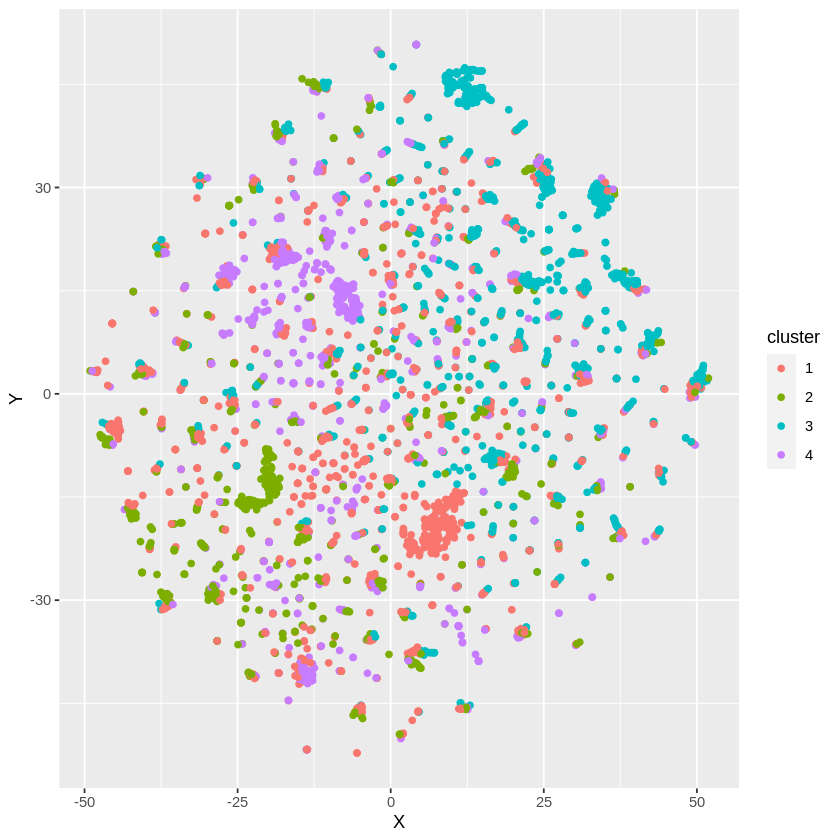

In [ ]:
pam_fit <- pam(gower_distance, diss = TRUE, 4)
tsne_obj <- Rtsne(gower_distance, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

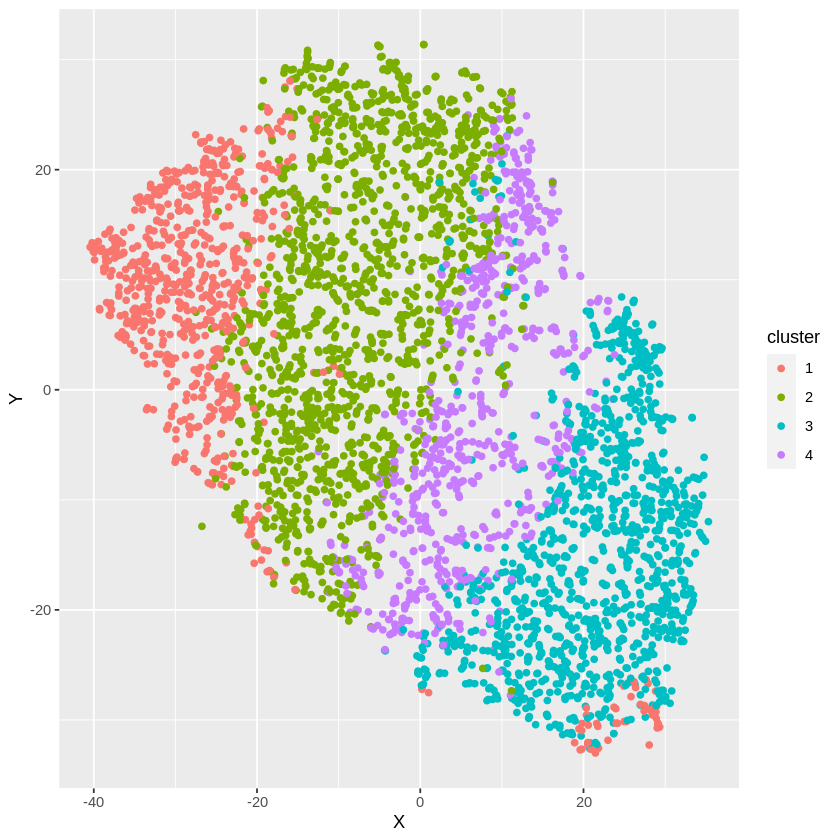

In [ ]:
#item_brand도 빼고 돌린 것
pam_fit <- pam(gower_distance2, diss = TRUE, 4)
tsne_obj <- Rtsne(gower_distance2, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

## 5 CLUSTER

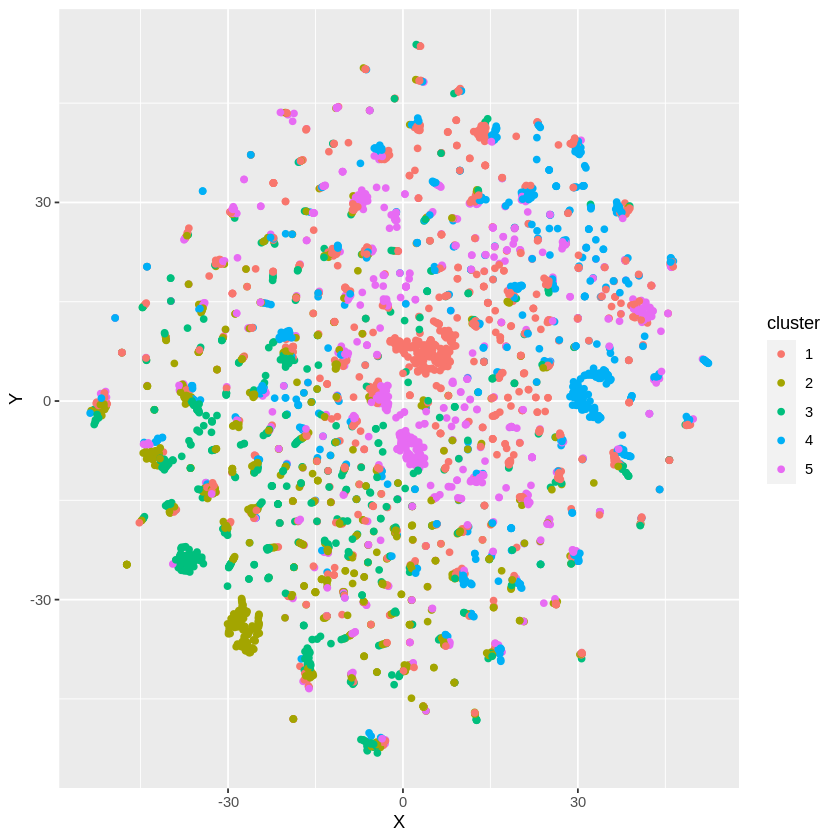

In [ ]:
pam_fit <- pam(gower_distance, diss = TRUE, 5)
tsne_obj <- Rtsne(gower_distance, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

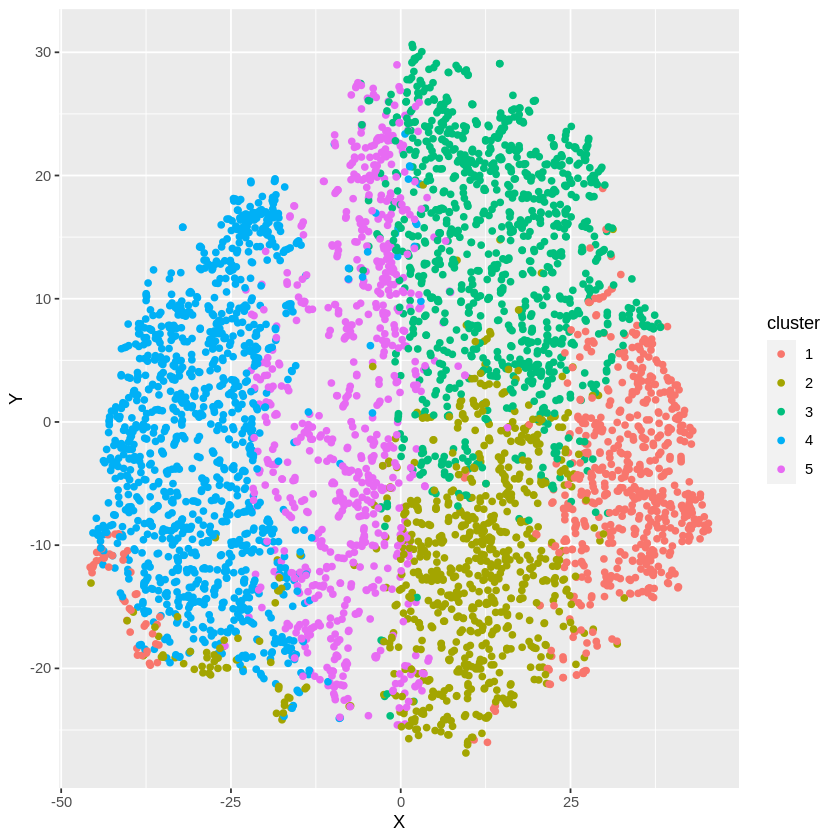

In [ ]:
#item_brand도 빼고
pam_fit <- pam(gower_distance2, diss = TRUE, 5)
tsne_obj <- Rtsne(gower_distance2, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

## 6 CLUSTER

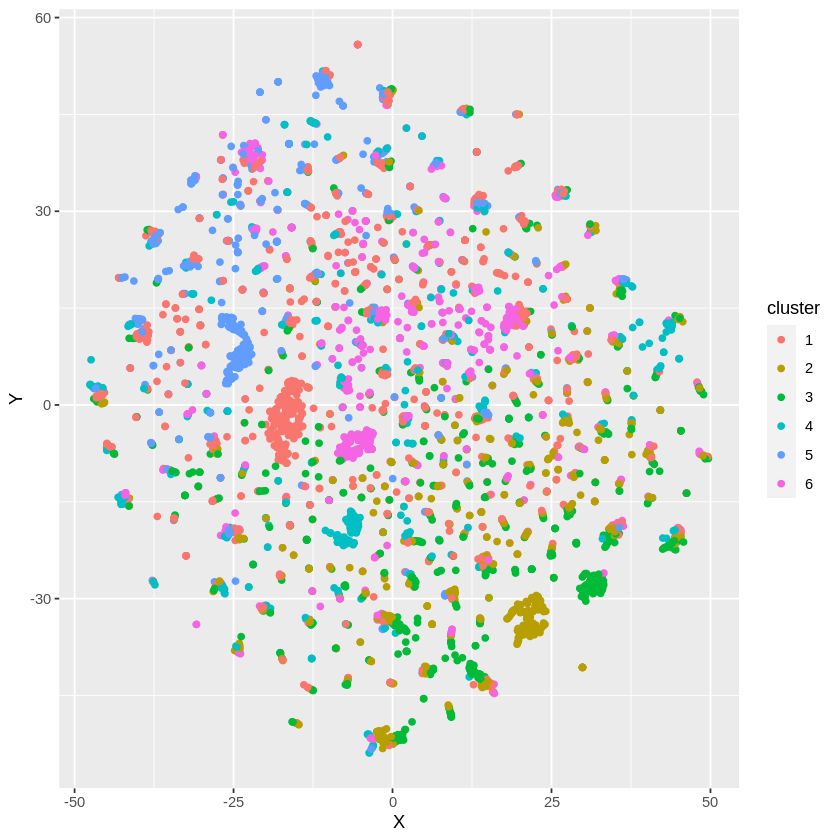

In [ ]:
pam_fit <- pam(gower_distance, diss = TRUE, 6)
tsne_obj <- Rtsne(gower_distance, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

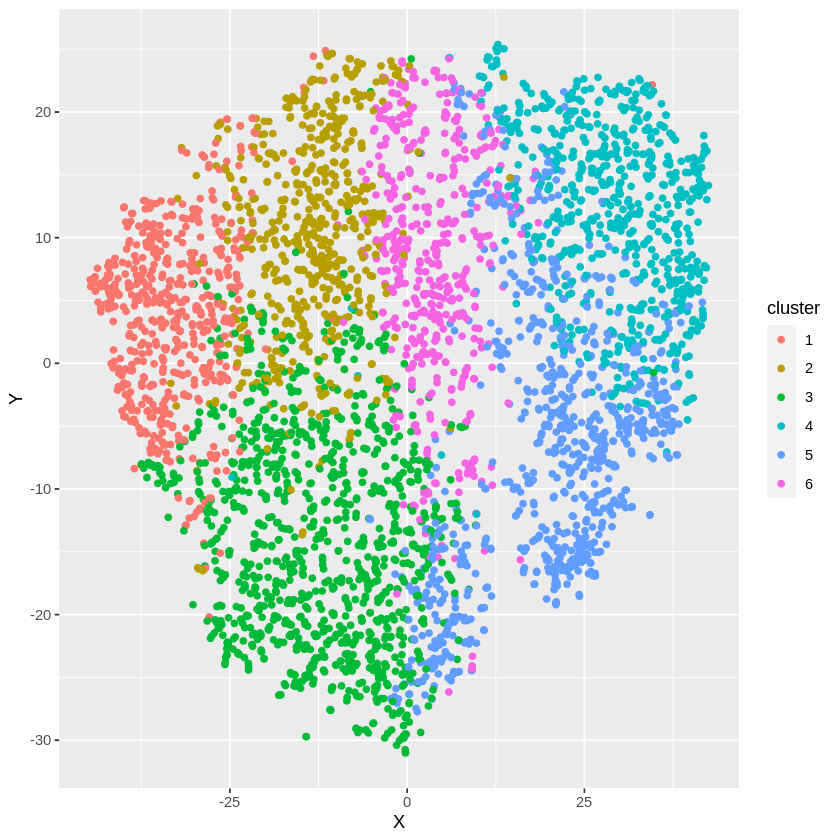

In [ ]:
#item_brand도 빼고
pam_fit <- pam(gower_distance2, diss = TRUE, 6)
tsne_obj <- Rtsne(gower_distance2, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

## 7 CLUSTER

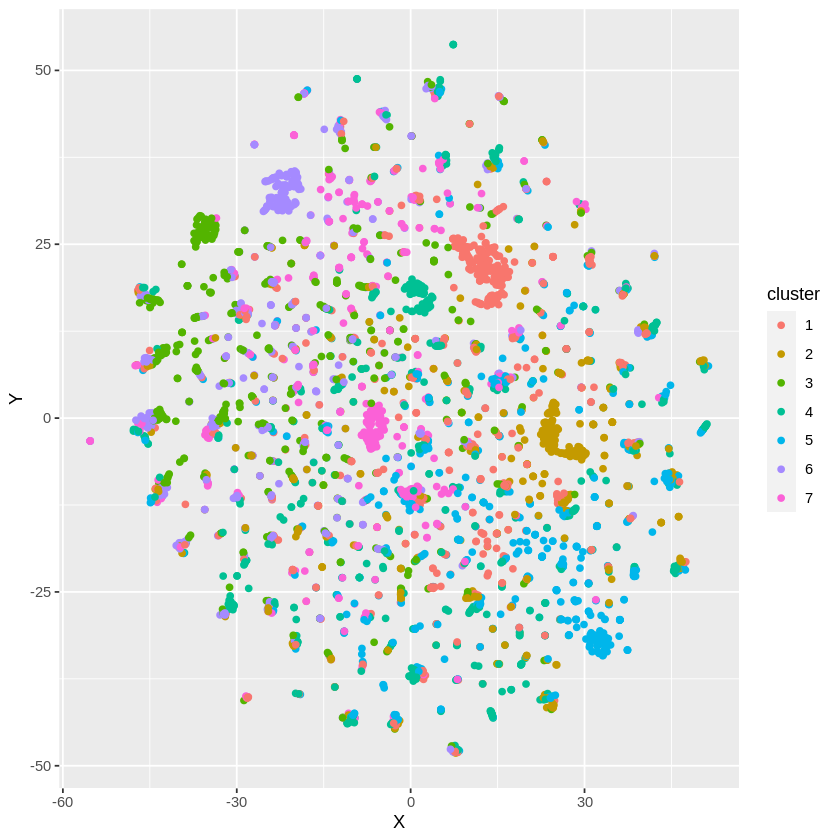

In [ ]:
#item_category_1 빼고
pam_fit <- pam(gower_distance, diss = TRUE, 7)
tsne_obj <- Rtsne(gower_distance, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

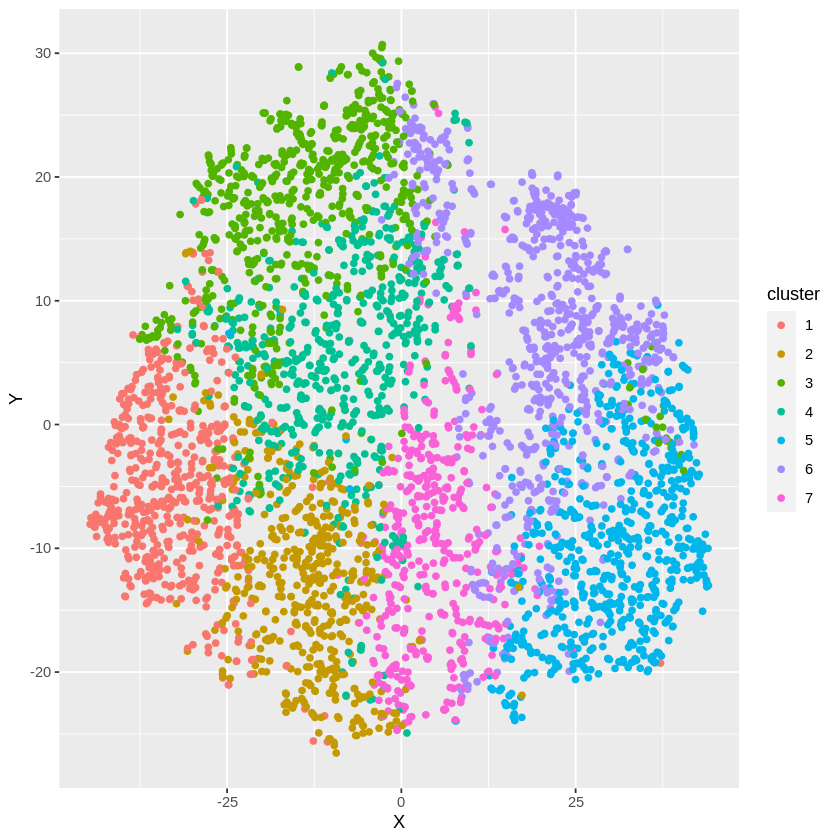

In [ ]:
#item_brand도 빼고
pam_fit <- pam(gower_distance2, diss = TRUE, 7)
tsne_obj <- Rtsne(gower_distance2, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

## 8 CLUSTER

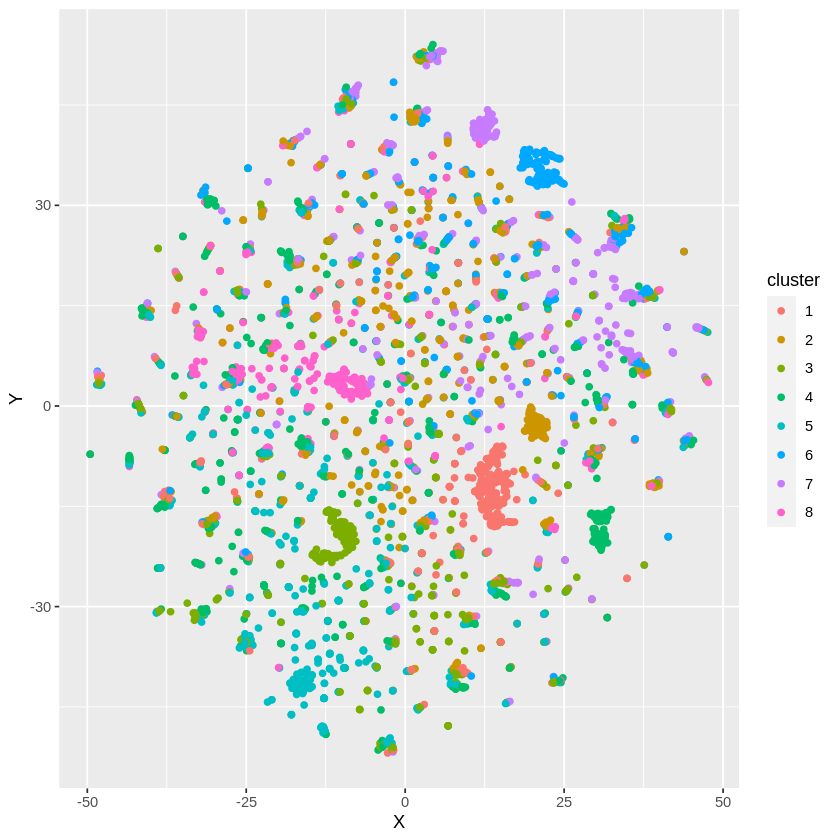

In [ ]:
pam_fit <- pam(gower_distance, diss = TRUE, 8)
tsne_obj <- Rtsne(gower_distance, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

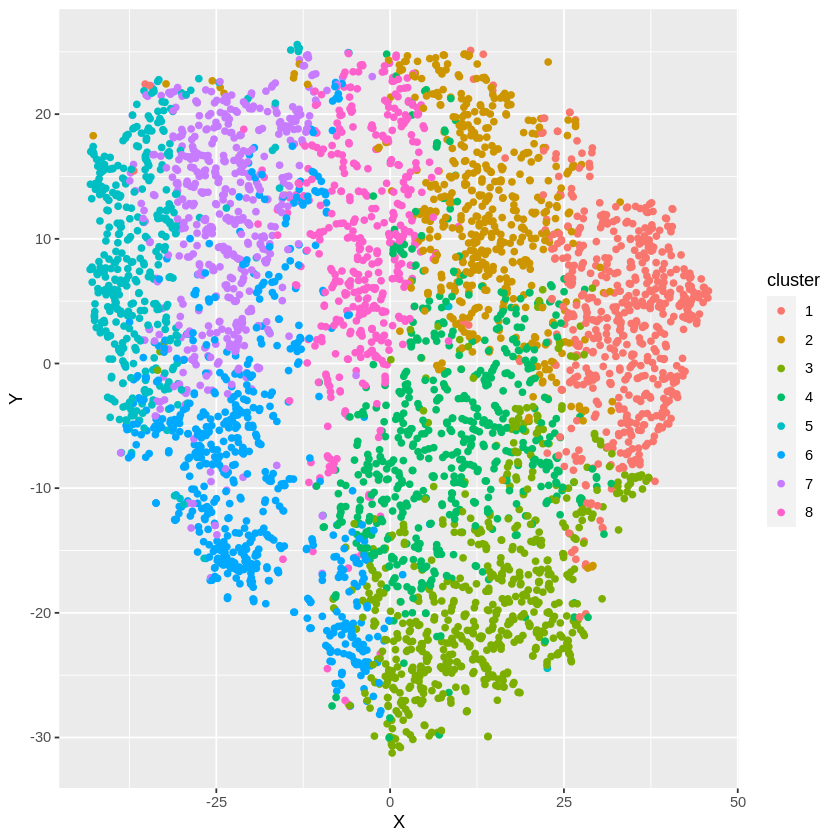

In [ ]:
#item_brand도 빼고
pam_fit <- pam(gower_distance2, diss = TRUE, 8)
tsne_obj <- Rtsne(gower_distance2, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

## 9 CLUSTER

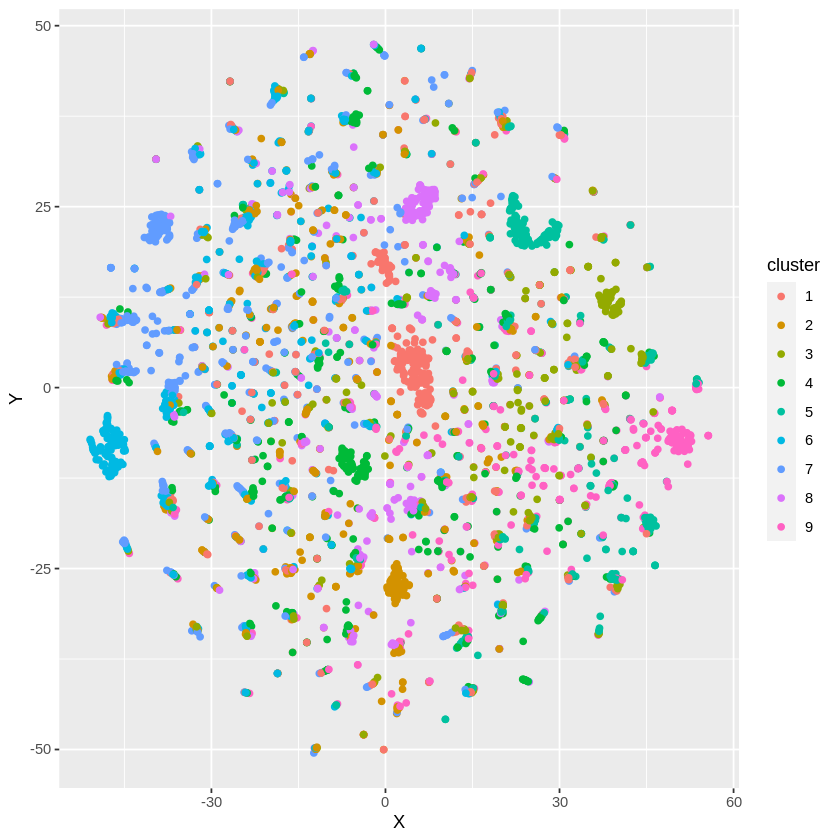

In [ ]:
pam_fit <- pam(gower_distance, diss = TRUE, 9)
tsne_obj <- Rtsne(gower_distance, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

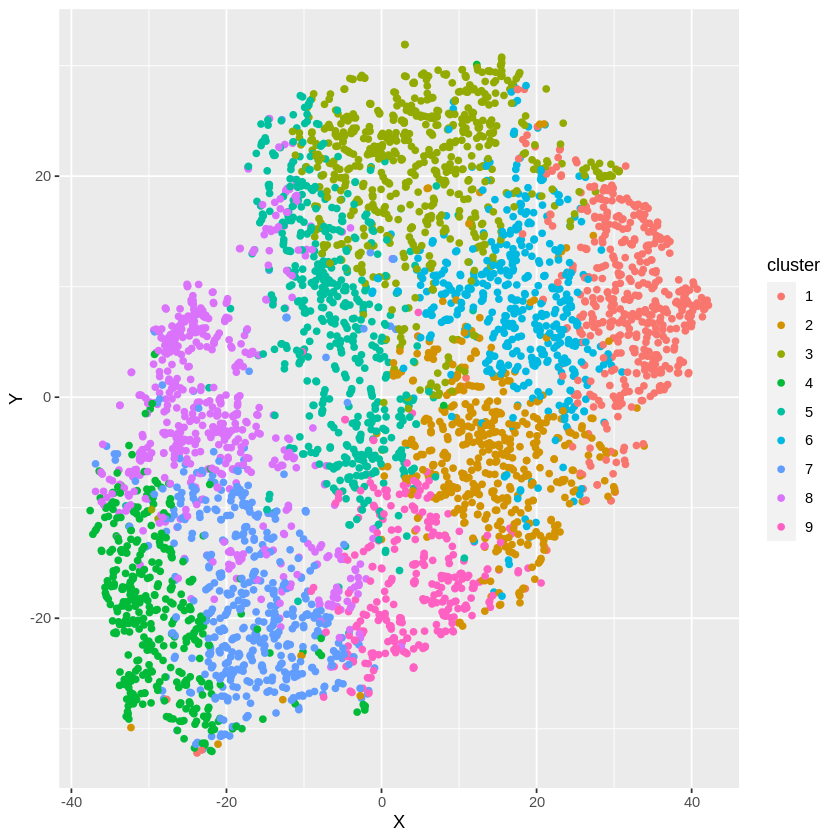

In [ ]:
#item_brand도 빼고
pam_fit <- pam(gower_distance2, diss = TRUE, 9)
tsne_obj <- Rtsne(gower_distance2, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

## 10 CLUSTER

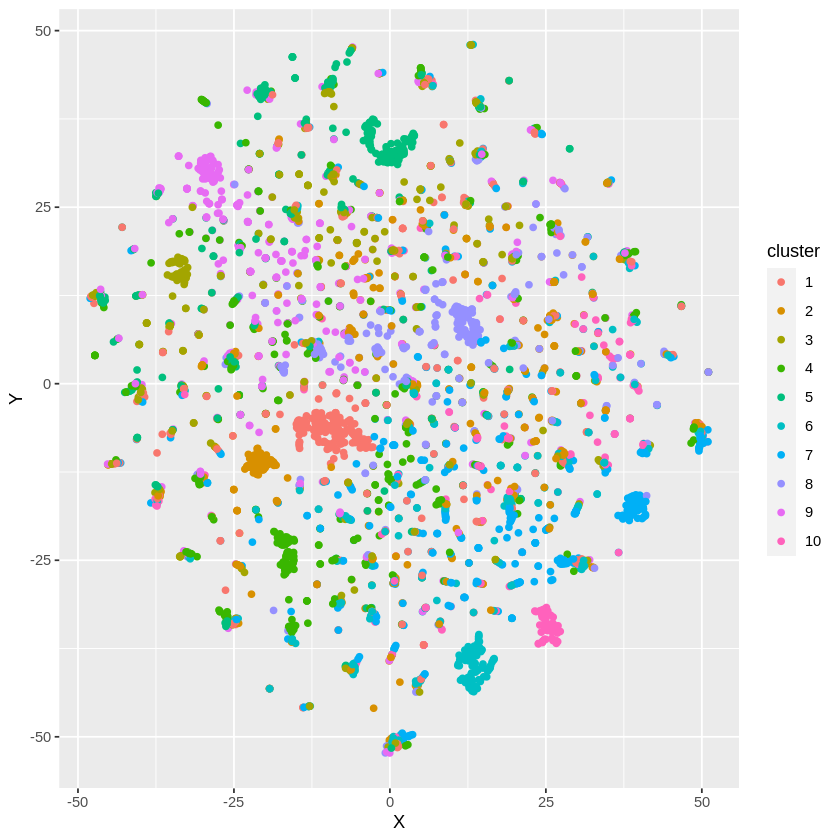

In [ ]:
pam_fit <- pam(gower_distance, diss = TRUE, 10)
tsne_obj <- Rtsne(gower_distance, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

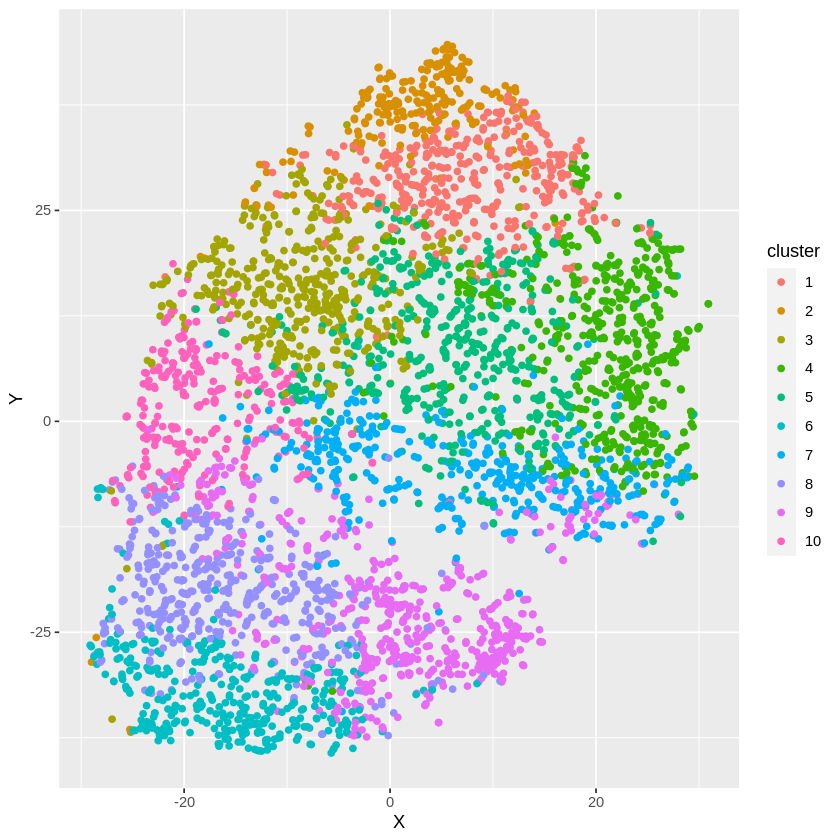

In [ ]:
#item_brand도 빼고
pam_fit <- pam(gower_distance2, diss = TRUE, 10)
tsne_obj <- Rtsne(gower_distance2, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

## 11 CLUSTER

In [ ]:
pam_fit <- pam(gower_distance, diss = TRUE, 11)
tsne_obj <- Rtsne(gower_distance, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

In [ ]:
#item_brand도 빼고
pam_fit <- pam(gower_distance2, diss = TRUE, 11)
tsne_obj <- Rtsne(gower_distance2, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

# ELSE

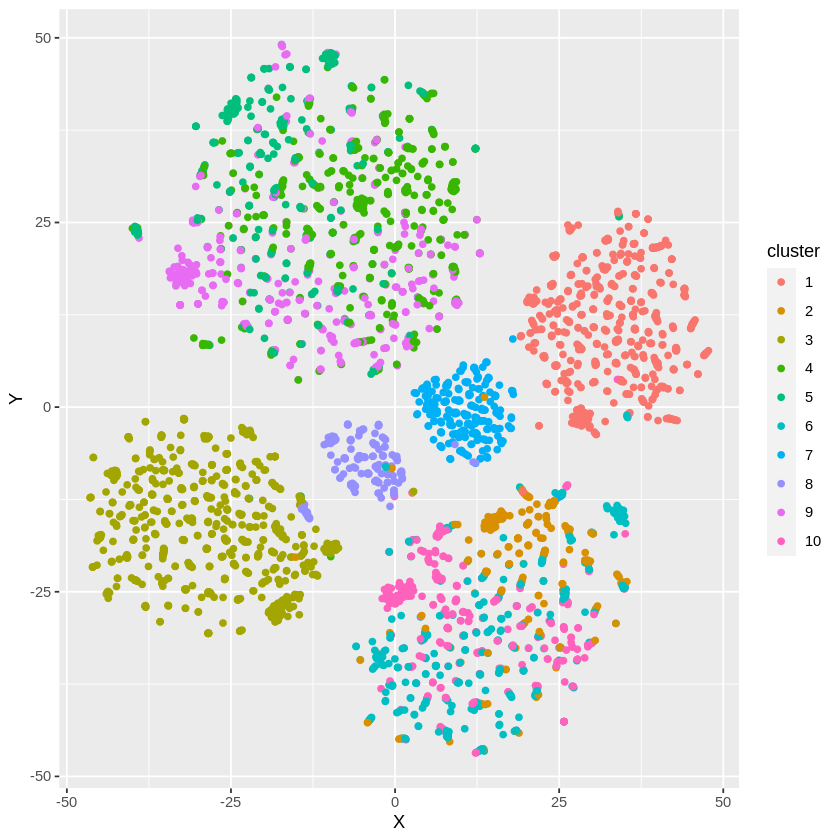

In [ ]:
pam_fit <- pam(gower_distance, diss = TRUE, 10)
tsne_obj <- Rtsne(gower_distance, is_distance = TRUE)
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster))

In [ ]:
for (i in 3:15){
    print(i)
    pam_fit <- pam(gower_distance, diss = TRUE, i)
    tsne_obj <- Rtsne(gower_distance, is_distance = TRUE)
    tsne_data <- tsne_obj$Y %>% data.frame() %>%
    setNames(c("X", "Y")) %>% mutate(cluster = factor(pam_fit$clustering))
    ggplot(aes(x = X, y = Y), data = tsne_data) + geom_point(aes(color = cluster))
}

In [ ]:
new = matrix(0, nrow = 850, ncol = 10)
for (i in 1:10){
    new[,i] = as.numeric(reduced[,i])
    print(class(new[,i]))
}

[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"
[1] "numeric"


In [ ]:
reduced <- new
class(reduced[,1])

[1] "numeric"

In [ ]:
d <- parDist(reduced, method = "custom", func = corFuncPtr)
d[is.na(d)] <- 0


In [ ]:
hc2 <- fastcluster::hclust(d, method = "ward.D")

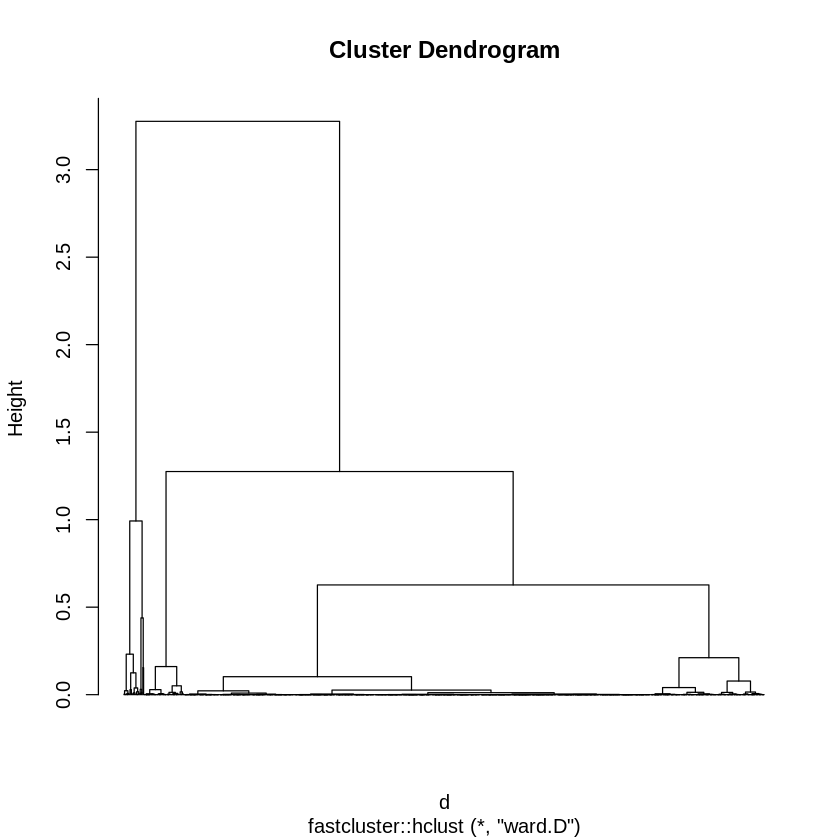

In [ ]:
plot(hc2, cex = 0.01, hang = -1, label = F)

In [ ]:
print(table(cutree(hc2, k = 3)))
print(table(cutree(hc2, k = 4)))
print(table(cutree(hc2, k = 5)))
print(table(cutree(hc2, k = 6)))
print(table(cutree(hc2, k = 10)))
print(table(cutree(hc2, k = 15)))


  1   2   3 
770  27  53 

  1   2   3   4 
770  21  53   6 

  1   2   3   4   5 
619  21 151  53   6 

  1   2   3   4   5   6 
619  21 151  53   4   2 

  1   2   3   4   5   6   7   8   9  10 
619   8  63  23  88  30   4  13   1   1 

  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 
473   8 146  30  17  40  48  30  33   4   9   6   1   4   1 


In [ ]:
write.csv(as.data.frame(cutree(hc2, k = 15)), "cl_15.csv")

In [ ]:
write.csv(as.data.frame(cutree(hc2, k = 5)), "vCol5.csv")
write.csv(as.data.frame(cutree(hc2, k = 6)), "vCol6.csv")
write.csv(as.data.frame(cutree(hc2, k = 7)), "vCol7.csv")

In [ ]:
install.packages("dtwclust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘jquerylib’, ‘bigmemory.sri’, ‘modeltools’, ‘iterators’, ‘RcppEigen’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘proxy’, ‘dtw’, ‘bigmemory’, ‘clue’, ‘flexclust’, ‘foreach’, ‘ggrepel’, ‘nloptr’, ‘RSpectra’, ‘reshape2’, ‘shiny’, ‘shinyjs’, ‘RcppThread’




In [ ]:
library(dtwclust)

Loading required package: proxy


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Loading required package: dtw

Loaded dtw v1.22-3. See ?dtw for help, citation("dtw") for use in publication.


dtwclust:
Setting random number generator to L'Ecuyer-CMRG (see RNGkind()).
To read the included vignettes type: browseVignettes("dtwclust").
See news(package = "dtwclust") after package updates.



In [ ]:
?tsclust